In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### Analysis

In [2]:
data = pd.read_csv('twitter_data/tweets_processed.csv')
green = pd.read_csv('twitter_data/green_tweets_processed.csv')

c:\Users\TheaK\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Uncomment the following for getting a random sample of the data (e.g. for creating a test set or looking at a random sample)

In [3]:
'''
green_push_factor = 10 #a sustainable tweet is sampled green_push_factor times more frequently than usual, choose 1 for same distribution as the original
num_tweets = 1000 #change to your needs 

dateTimeObj = str(datetime.now()).replace(" ","-").replace(":","-").replace(".","-")
data['green_weight'] = data['green'].apply(lambda x: green_push_factor if x else 1) 
data.sample(num_tweets, weights=data.green_weight).to_csv('sample_'+str(num_tweets)+"_"+dateTimeObj+'.csv', header=True, index=False, columns=list(data.axes[1]))
'''

'\ngreen_push_factor = 10 #a sustainable tweet is sampled green_push_factor times more frequently than usual, choose 1 for same distribution as the original\nnum_tweets = 1000 #change to your needs \n\ndateTimeObj = str(datetime.now()).replace(" ","-").replace(":","-").replace(".","-")\ndata[\'green_weight\'] = data[\'green\'].apply(lambda x: green_push_factor if x else 1) \ndata.sample(num_tweets, weights=data.green_weight).to_csv(\'sample_\'+str(num_tweets)+"_"+dateTimeObj+\'.csv\', header=True, index=False, columns=list(data.axes[1]))\n'

### Analyse grouped data

#### Boxplot

Set the desired metric, category grouping (groupby) and dataset as proposed in the comments

Text(0, 0.5, 'likes')

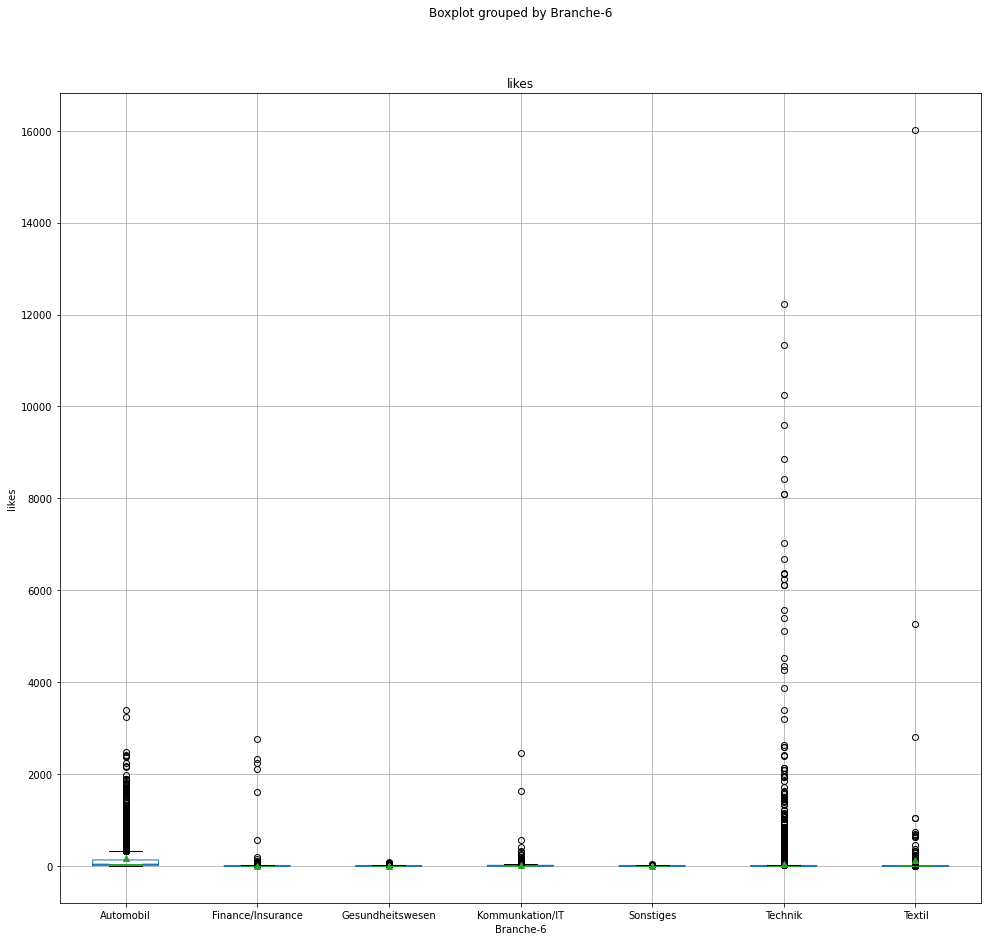

In [4]:
metric = "likes" #options: use "likes", "more_information_provided", "retweets", "quotes", "replies" or "year"
groupby = "Branche-6" #options: use "Branche-6", "green", "author", "B2C" or "year" (when using "author", set the rot variable in boxplot to 90)
#alternatively to use the green dataset instead of the whole on (replace data with green)
boxplot = green.boxplot([metric], by = [groupby],
                     figsize = (16, 15),
                     showmeans = True,
                     notch = True, 
                     rot=0 # set to 90 in case of more than 10 categories (e.g. author)
                     )
boxplot.set_xlabel(groupby)
boxplot.set_ylabel(metric)

In [5]:
#green_eng = green[green['lang'] =='en']
#green_eng['Tweets'].to_csv('green_eng_tweets_100123.csv', header=True, index=False)

#### Line/Bar Chart
Set the following variables to your needs and run the next three cells

In [6]:
groupby = 'year' #options: use "Branche-6", "green", "author", "B2C" or "year"
column = 'Tweets'
factor = 10
line_chart = True # set false for bar chart
figsize = (18,8)

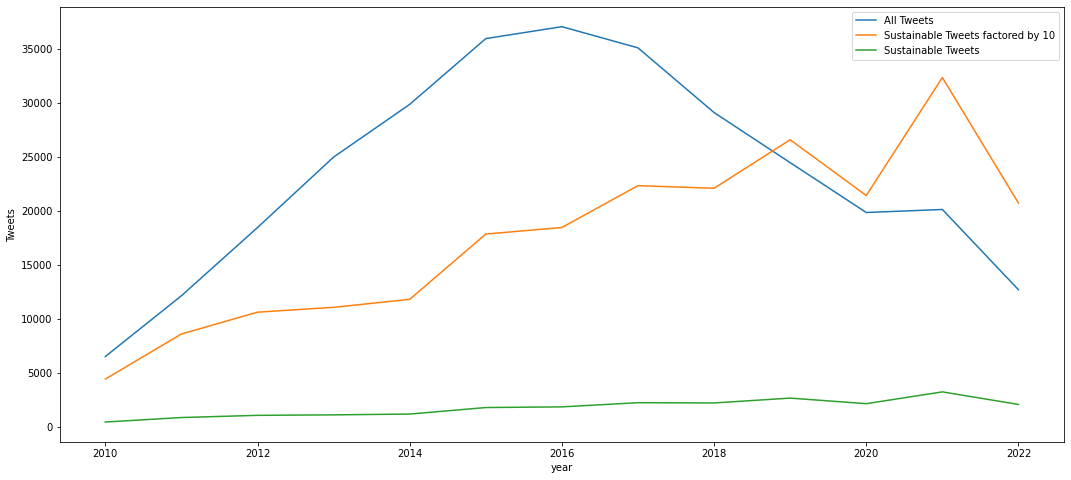

In [7]:
if line_chart:
    ax = data.groupby([groupby]).count()[column].plot(label='All '+column)
    green.groupby([groupby]).count()[column].multiply(10).plot(ax=ax, label='Sustainable '+column+' factored by 10')
    green.groupby([groupby]).count()[column].plot(figsize=figsize,ax=ax, label='Sustainable '+column, rot = 0) #set rot = 90 for turning the labels horizontally
else:
    #ax = data.groupby([groupby]).count()[column].plot.bar(label='All '+column)
    #green.groupby([groupby]).count()[column].multiply(10).plot.bar(ax=ax, label='Sustainable '+column+' factored by 10')
    #green.groupby([groupby]).count()[column].plot.bar(figsize=(12,5),ax=ax, label='Sustainable '+column, rot = 0) #set rot = 90 for turning the labels horizontally
    df = pd.concat([data[[groupby, column]].groupby([groupby]).count().reset_index().set_index(groupby),
    green[[groupby, column]].groupby([groupby]).count().multiply(factor).reset_index().set_index(groupby).rename(columns={column: column+'_green_factor_'+str(factor)}), 
    green[[groupby, column]].groupby([groupby]).count().reset_index().set_index(groupby).rename(columns={column: column+'_green'})], axis=1)
    ax = df.plot.bar(figsize = figsize)
ax.set_xlabel(groupby)
ax.set_ylabel(column)
ax.legend()

<AxesSubplot:xlabel='year'>

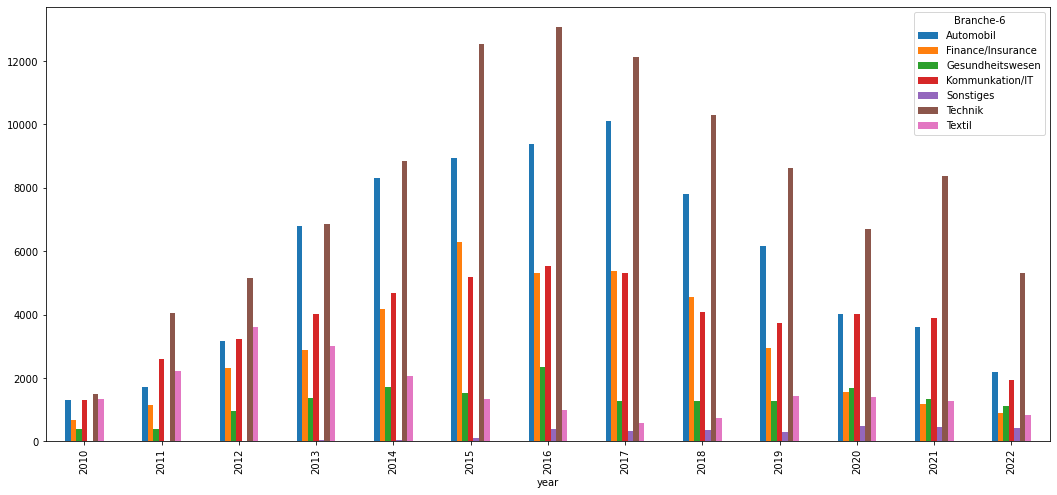

In [8]:
first_grouping = "year"
second_grouping = "Branche-6"
data.groupby([first_grouping, second_grouping]).count()['Tweets'].unstack().plot.bar(figsize = figsize)

#### Table Data
Set the groupby variable and run

In [9]:
groupby = "Branche-6" # options "autor", "Branche-6", "B2C", "year"

In [10]:
num_greens = green.groupby([groupby]) \
        .agg({'Tweets':'count', 'likes':'mean', 'retweets':'mean', 'replies':'mean','quotes':'mean'}) \
        .rename(columns={'Tweets':'_num_Tweets','likes':'mean_likes','replies':'mean_replies', 'quotes':'mean_quotes', 'retweets':'mean_retweets'}) \
        .reset_index().set_index(groupby)
num_tweets = data.groupby([groupby]) \
        .agg({'Tweets':'count', 'likes':'mean', 'retweets':'mean', 'replies':'mean','quotes':'mean'}) \
       .rename(columns={'Tweets':'_num_Tweets','likes':'mean_likes','replies':'mean_replies', 'quotes':'mean_quotes', 'retweets':'mean_retweets'}) \
        .reset_index() \
        .set_index(groupby)
comparison = num_tweets.join(num_greens, lsuffix="_all", rsuffix="_green", sort=True)
comparison['_percentage_green'] = round(comparison['_num_Tweets_green']*100.0/comparison['_num_Tweets_all'],1)
comparison.sort_values(by=['_percentage_green']).reindex(sorted(comparison.columns), axis=1)

,_num_Tweets_all,_num_Tweets_green,_percentage_green,mean_likes_all,mean_likes_green,mean_quotes_all,mean_quotes_green,mean_replies_all,mean_replies_green,mean_retweets_all,mean_retweets_green
Branche-6,,,,,,,,,,,
Gesundheitswesen,16658,202,1.2,10.238084,5.386139,0.200024,0.133663,0.328731,0.232673,5.107936,2.683168
Textil,20818,287,1.4,130.185224,122.174216,2.827601,1.641115,4.357671,3.665505,169.317994,52.717770
Automobil,73526,2309,3.1,167.615565,168.605890,2.353902,3.015158,5.280404,5.584669,50.222316,30.345171
Kommunkation/IT,49463,2337,4.7,15.037846,12.706889,0.449730,0.528027,0.840770,0.778776,9.192164,6.821994
Finance/Insurance,39291,3039,7.7,6.354356,8.268509,0.227838,0.338927,0.562852,1.835472,6.173246,11.936163
Technik,103431,14190,13.7,30.971527,33.228964,0.546345,0.547639,0.994586,1.076392,15.012540,11.728894
Sonstiges,2944,455,15.5,4.257133,4.606593,0.246603,0.248352,0.388247,0.378022,2.031929,1.175824
